SP901 CAPSTONE for Machine Learning And Data Science

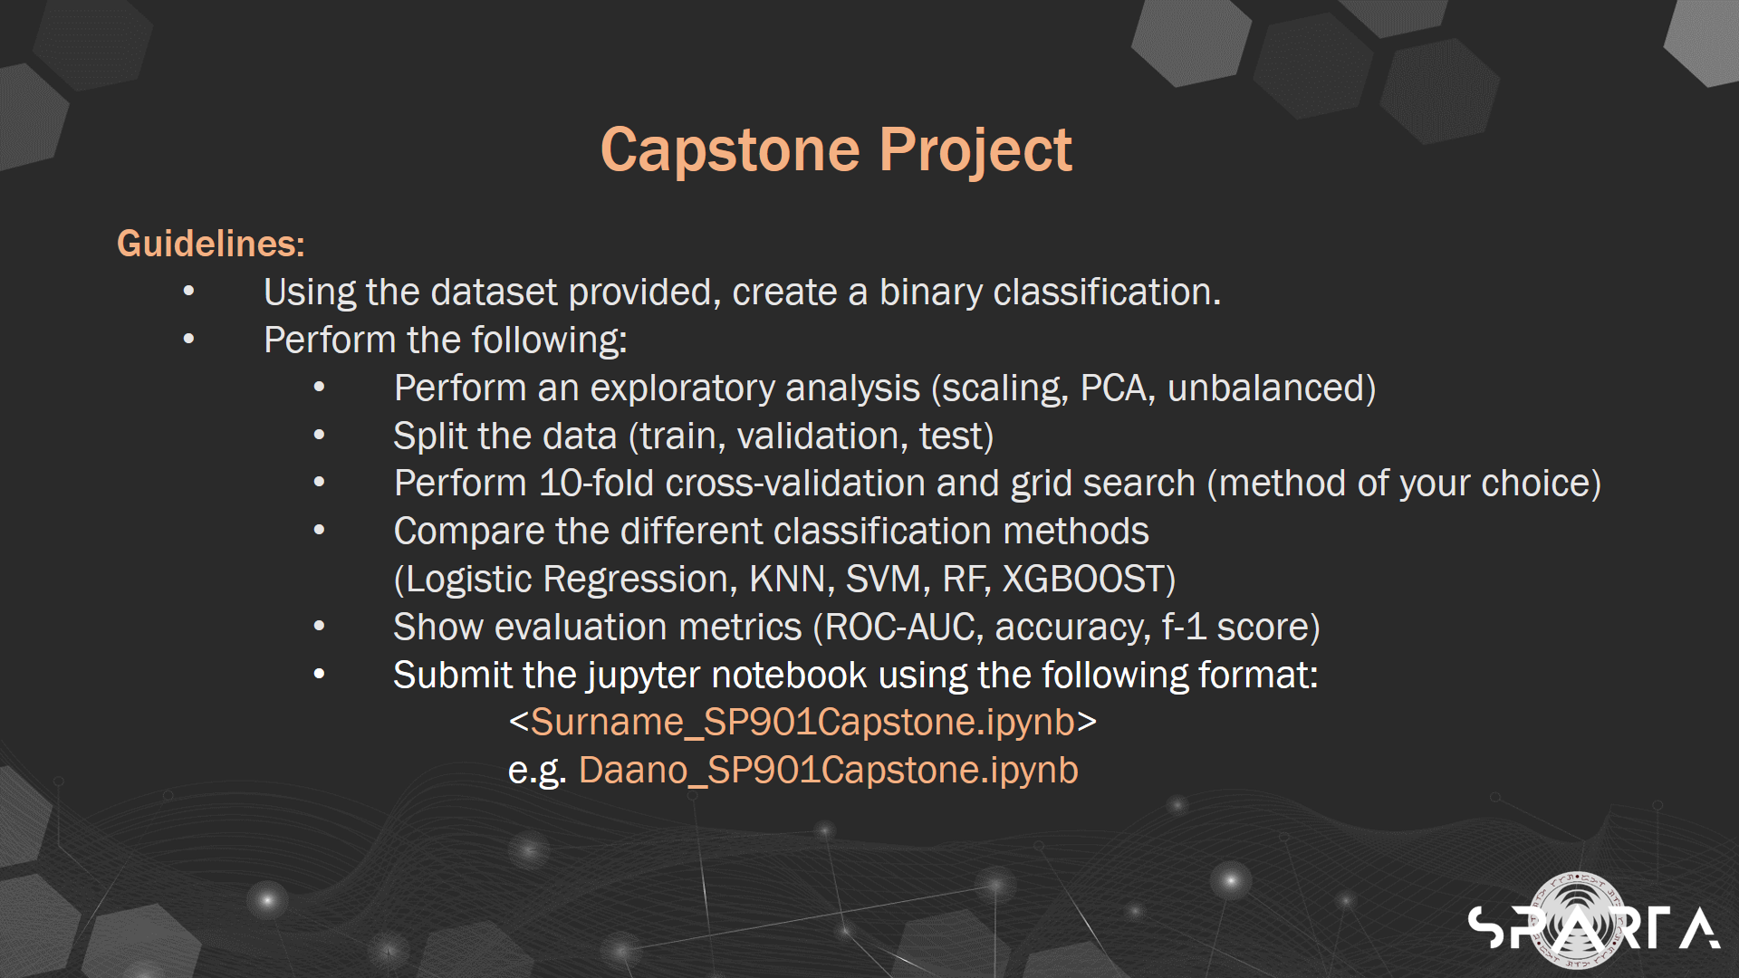

In [10]:
#insert image here
#for markdown
from IPython.display import Image
Image(filename='SP901_CS.png')



In [1]:
#In this Module,they provide the data set for the capstone project.
#but we dont know what the data set is about, so we need to explore the data set first.
#First we need to import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset 
Before that i want to know that i already changed the separator of semicolon to comma in the dataset.
Exporatory Analysis


In [3]:
#read the data set
data = pd.read_csv('SP901_CS_completedata.csv')
data.head()


,PatientID,Failure.binary,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,...,LZLGE.W.ADC,LZHGE.W.ADC,GLNU_area.W.ADC,ZSNU.W.ADC,ZSP.W.ADC,GLNU_norm.W.ADC,ZSNU_norm.W.ADC,GLVAR_area.W.ADC,ZSVAR.W.ADC,Entropy_area.W.ADC
0,1,0,12.85352,46.256345,6.249117,17.825541,9.783773,6.814365,2.612479,0.688533,...,0.00690,6201.93480,4.13400,239.28938,0.97918,0.01899,0.95586,1145.10496,0.02586,6.28632
1,2,1,12.21115,27.454540,11.005214,26.469077,15.426640,12.932074,3.598298,0.789526,...,0.00423,16054.01263,8.37627,644.73702,0.95637,0.01461,0.93288,847.52537,0.04153,6.77853
2,3,0,12.75682,90.195696,2.777718,6.877486,4.295330,0.923425,0.962163,0.248637,...,0.00453,6674.63840,13.11686,1165.70261,0.97268,0.02501,0.91537,1923.85705,0.07104,7.15685
3,4,1,13.46730,325.643330,6.296588,22.029843,10.334779,6.649795,2.580759,0.832011,...,0.00888,17172.90951,23.84726,2760.41293,0.97203,0.01069,0.94658,1329.95290,0.03848,7.29521
4,5,0,12.63733,89.579042,3.583846,7.922501,4.454175,0.572094,0.757225,1.574845,...,0.00405,13231.94294,8.14437,784.59729,0.96469,0.02526,0.93769,1116.38669,0.05223,7.05149


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 430 entries, PatientID to Entropy_area.W.ADC
dtypes: float64(428), int64(2)
memory usage: 661.9 KB


In [5]:
#determine the data type of each column
data.dtypes

PatientID               int64
Failure.binary          int64
Entropy_cooc.W.ADC    float64
GLNU_align.H.PET      float64
Min_hist.PET          float64
                       ...   
GLNU_norm.W.ADC       float64
ZSNU_norm.W.ADC       float64
GLVAR_area.W.ADC      float64
ZSVAR.W.ADC           float64
Entropy_area.W.ADC    float64
Length: 430, dtype: object

In [7]:
#as we inspect the data set, we found  that patient ID is need to be convert to ID role and 
#the target variable(Failure.binary) is need to be convert to target role
data['PatientID'] = data['PatientID'].astype('object')
data['Failure.binary'] = data['Failure.binary'].astype('category')



In [8]:
#check the data type again
data.dtypes

PatientID               object
Failure.binary        category
Entropy_cooc.W.ADC     float64
GLNU_align.H.PET       float64
Min_hist.PET           float64
                        ...   
GLNU_norm.W.ADC        float64
ZSNU_norm.W.ADC        float64
GLVAR_area.W.ADC       float64
ZSVAR.W.ADC            float64
Entropy_area.W.ADC     float64
Length: 430, dtype: object

Why the target variable is important in deep Learning ?

Without a labeled target, supervised machine learning algorithms would be unable to map available data to outcomes,
just as a child would be incapable of figuring out that cats are called “cats” 
without having been told so at least a few times. It is important to have a 
well-defined target since the only thing an algorithm does is learn a function that
 maps relationships between input data and the target.
 The model’s outcomes will be meaningless if your target doesn’t make sense.

In [9]:
#check the missing value
data.isnull().sum()


PatientID             0
Failure.binary        0
Entropy_cooc.W.ADC    0
GLNU_align.H.PET      0
Min_hist.PET          0
                     ..
GLNU_norm.W.ADC       0
ZSNU_norm.W.ADC       0
GLVAR_area.W.ADC      0
ZSVAR.W.ADC           0
Entropy_area.W.ADC    0
Length: 430, dtype: int64

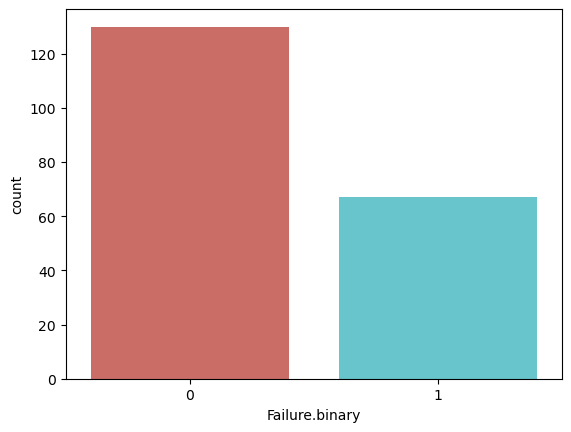

<Figure size 640x480 with 0 Axes>

In [11]:
#Explore the distribution of the target variable (binary classification label) to identify class imbalances.
#The target variable is Failure.binary
data['Failure.binary'].value_counts()

#check the distribution of the target variable
sns.countplot(x='Failure.binary', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')


In [12]:
 #perform feature scaling
#we will use StandardScaler to standardize the data set
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()


,PatientID,Failure.binary,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,...,LZLGE.W.ADC,LZHGE.W.ADC,GLNU_area.W.ADC,ZSNU.W.ADC,ZSP.W.ADC,GLNU_norm.W.ADC,ZSNU_norm.W.ADC,GLVAR_area.W.ADC,ZSVAR.W.ADC,Entropy_area.W.ADC
0,-1.723281,-0.717903,0.554314,-0.572091,-0.455298,-0.437242,-0.421557,-0.263268,-0.236852,-0.323760,...,0.015349,-0.782226,-0.693232,-0.653038,-0.508114,0.077177,-0.490055,0.040310,-0.706429,-0.743340
1,-1.705696,1.392946,-0.065033,-0.791047,0.501110,0.149074,0.316199,0.395979,0.297774,-0.177428,...,-0.067509,0.298387,-0.611587,-0.567484,-0.562108,-0.062609,-0.545867,-0.354364,-0.427150,-0.578588
2,-1.688112,-0.717903,0.461080,-0.060396,-1.153365,-1.179881,-1.139123,-0.898079,-1.131847,-0.961141,...,-0.058199,-0.730378,-0.520352,-0.457554,-0.523501,0.269302,-0.588394,1.073154,0.098793,-0.451958
3,-1.670527,1.392946,1.146096,2.681503,-0.445752,-0.152052,-0.349518,-0.281003,-0.254055,-0.115870,...,0.076795,0.421112,-0.313839,-0.121050,-0.525039,-0.187714,-0.512594,0.285470,-0.481509,-0.405647
4,-1.652943,-0.717903,0.345873,-0.067577,-0.991260,-1.108994,-1.118356,-0.935939,-1.242989,0.960448,...,-0.073095,-0.011148,-0.616050,-0.537972,-0.542414,0.277280,-0.534185,0.002222,-0.236449,-0.487224


In [13]:
#Apply Principal Component Analysis (PCA) for dimensionality reduction because we a lot of features
#we will use PCA to reduce the dimension of the data set
pca = PCA(n_components=10)
data_pca = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data_pca, columns=['pca_%i' % i for i in range(10)])
data_pca.head()



,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
0,-7.026900,3.645423,-0.918680,-3.592279,1.919903,1.207228,-2.718124,-1.463298,0.904536,0.639655
1,-7.076280,0.687759,0.278700,-4.732078,-3.185276,3.374399,0.745521,0.827781,-1.179442,-0.308843
2,-6.280618,6.138992,1.244618,2.583976,2.191525,-1.930048,-6.686955,-1.711171,1.279467,-1.623721
3,-7.080645,-1.625618,5.607045,1.001807,1.222252,1.271077,0.849083,-1.998856,-1.695145,-0.967694
4,-8.304698,8.170671,2.121811,4.874132,0.055166,1.688656,1.462334,1.095845,2.601025,-0.962743


Split the data into train, validation, and test sets

In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(data_pca, data['Failure.binary'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)


(137, 10) (30, 10) (30, 10)


Perform 10-fold cross-validation on the training set and GridSearchCV


In [17]:
# Define classification algorithms and their parameter grids for grid search
#we will use 5 classification algorithms
#Logistic Regression
#KNN
#SVM
#Random Forest
#XGBoost
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1.0, 10.0]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'SVM': (SVC(), {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
    'XGBoost': (xgb.XGBClassifier(), {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300]})
}


In [18]:
# Evaluate models using 10-fold cross-validation and grid search
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    

In [19]:
 # Evaluate on the validation set
y_pred = best_model.predict(X_val)
roc_auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
results[model_name] = {
    'Best Model': best_model,
    'ROC-AUC': roc_auc,
    'Accuracy': accuracy,
    'F1 Score': f1
}

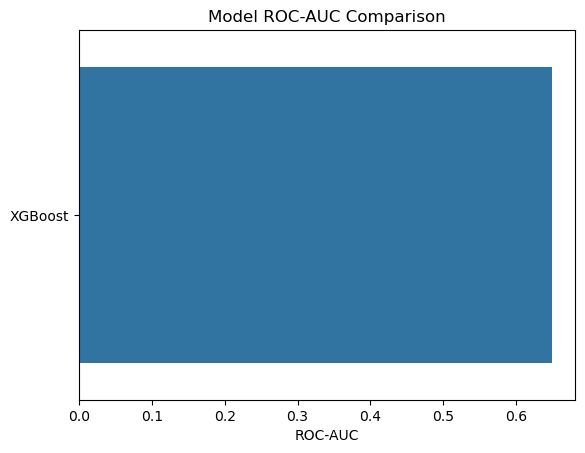

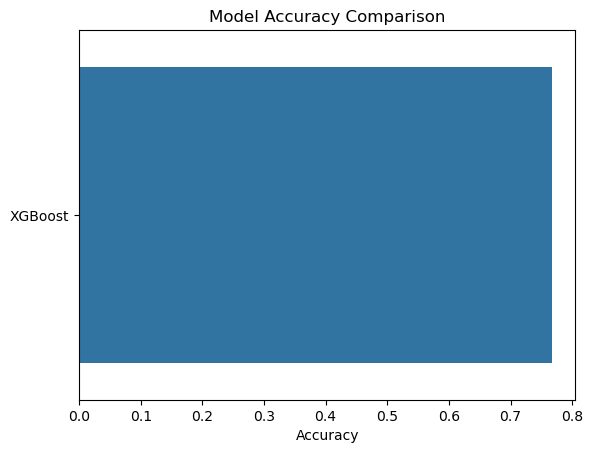

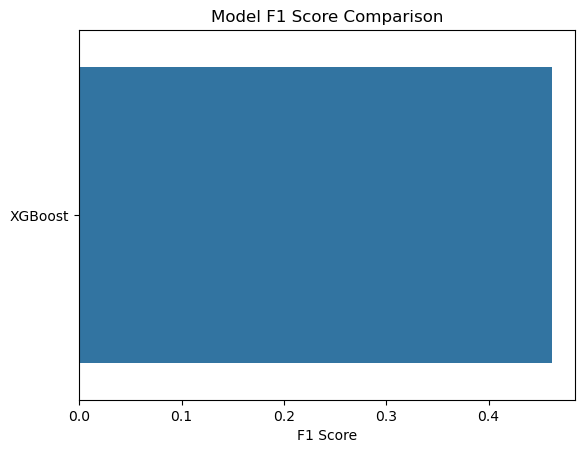

In [20]:
#visualize the results
results_df = pd.DataFrame(results).T
sns.barplot(data=results_df, x='ROC-AUC', y=results_df.index)
plt.title('Model ROC-AUC Comparison')
plt.show()

sns.barplot(data=results_df, x='Accuracy', y=results_df.index)
plt.title('Model Accuracy Comparison')
plt.show()

sns.barplot(data=results_df, x='F1 Score', y=results_df.index)
plt.title('Model F1 Score Comparison')
plt.show()




In [22]:
# Choose the best model based on ROC-AUC or other relevant criteria
results_df['ROC-AUC'] = pd.to_numeric(results_df['ROC-AUC'])
best_model_name = results_df['ROC-AUC'].idxmax()
best_model = results[best_model_name]['Best Model']


In [23]:
# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)


FINAL EVALUATION METRICS


In [24]:
# Print final evaluation metrics
print(f"Best Model: {best_model_name}")
print(f"ROC-AUC on Test Set: {roc_auc_test}")
print(f"Accuracy on Test Set: {accuracy_test}")
print(f"F1 Score on Test Set: {f1_test}")

Best Model: XGBoost
ROC-AUC on Test Set: 0.7058823529411764
Accuracy on Test Set: 0.6666666666666666
F1 Score on Test Set: 0.5833333333333334
